In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [3]:
df = pd.read_csv("../datasets/Housing_processed.csv")
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,0,1,2,1,2,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,2,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,1,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,2,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,2,11410000


In [8]:
# X -> Independent features
# y-> target variable (dependent variable)
X  = df.drop(columns=['price'])
y  = df['price']


#Splitting the dataset into train and test set
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [9]:
#initialized the LR model
model = LinearRegression()

model.fit(X_train , y_train)

y_pred = model.predict(X_test)

In [ ]:
#Performance metrics

print(f"MSE:{mean_squared_error(y_test , y_pred) : .3f}")
print(f"R2 SCORE : {r2_score(y_test , y_pred) : .3f}")
print(f"MAE : {mean_absolute_error(y_test , y_pred) : .3f}")

#Model explains 65 % of the variance

MSE: 1771751116594.035
R2 SCORE :  0.649
MAE :  979679.691


Plot regression line and interpret coefficients.

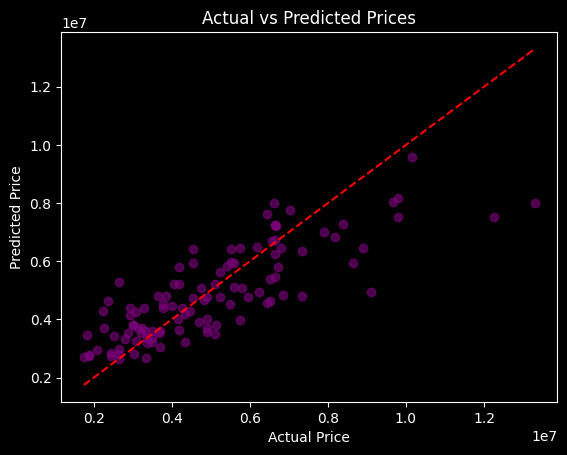

In [ ]:
import matplotlib.pyplot as plt

if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel(X.columns[0])
    plt.ylabel('Price')
    plt.title('Linear Regression Fit')
    plt.legend()
    plt.show()
else:
    plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

In [16]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

             Feature   Coefficient
0               area  2.358488e+02
1           bedrooms  7.857449e+04
2          bathrooms  1.097117e+06
3            stories  4.062232e+05
4           mainroad  3.668242e+05
5          guestroom  2.331468e+05
6           basement  3.931598e+05
7    hotwaterheating  6.878813e+05
8    airconditioning  7.855506e+05
9            parking  2.257565e+05
10          prefarea  6.299017e+05
11  furnishingstatus  2.103971e+05
